In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score,precision_score, f1_score, roc_auc_score, classification_report, confusion_matrix


In [2]:
#loading the images
images = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_X.npy")

In [3]:
#loading the classes
classes = np.load("/mnt/c/users/admin/desktop/F21DL/smiley_dataset/smiley_Y.npy")

In [4]:
print("Images shape:", images.shape)


Images shape: (204, 9, 9, 1)


In [5]:
print("Classes shape:", classes.shape)

Classes shape: (204,)


In [6]:
#verifying the number of unique classes with their corresponding leabels
# Get the unique classes and their counts
unique_classes, class_counts = np.unique(classes, return_counts=True)
# Print the unique classes and their counts
for class_label, count in zip(unique_classes, class_counts):
    print("Class:", class_label, "Count:", count)


Class: 0.0 Count: 72
Class: 1.0 Count: 60
Class: 2.0 Count: 72


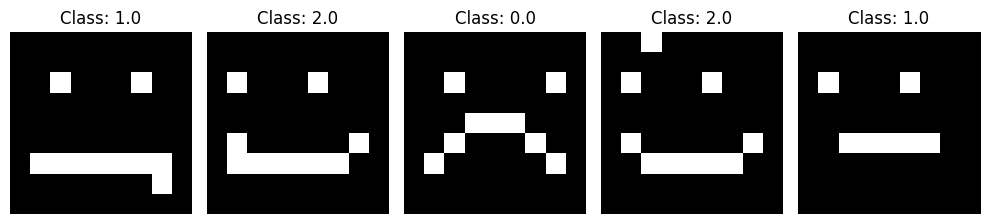

In [7]:
# Select some random indices for visualization
indices = np.random.choice(len(images), size=5, replace=False)

# Plot the selected images
fig, axes = plt.subplots(1, len(indices), figsize=(10, 4))
for i, index in enumerate(indices):
    axes[i].imshow(images[index, :, :, 0], cmap='gray')
    axes[i].set_title(f"Class: {classes[index]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.2, random_state=42)

In [9]:
# Create an instance of the Naïve Bayes classifier
naive_bayes = GaussianNB()



In [10]:
# Train the classifier on the training set
naive_bayes.fit(X_train.reshape(X_train.shape[0], -1), y_train)



GaussianNB()

In [11]:
# Reshape the testing set to match the input format
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)


In [12]:

# Make predictions on the testing set
y_pred = naive_bayes.predict(X_test_reshaped)


In [13]:

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.6585365853658537


In [14]:
# Generate and print the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)



Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.38      0.67      0.48         9
         2.0       0.79      0.65      0.71        17

    accuracy                           0.66        41
   macro avg       0.69      0.66      0.65        41
weighted avg       0.74      0.66      0.68        41



In [15]:
# Generate and print the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_mat)


Confusion Matrix:
 [[10  4  1]
 [ 1  6  2]
 [ 0  6 11]]


In [16]:

# Calculate and print TP rate, FP rate, precision, recall, and F measure
tp_rate = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[1, 0])
fp_rate = confusion_mat[0, 1] / (confusion_mat[0, 1] + confusion_mat[0, 0])
precision = confusion_mat[1, 1] / (confusion_mat[1, 1] + confusion_mat[0, 1])
recall = tp_rate
f_measure = 2 * (precision * recall) / (precision + recall)


In [17]:

print("TP Rate:", tp_rate)
print("FP Rate:", fp_rate)
print("Precision:", precision)
print("Recall:", recall)
print("F Measure:", f_measure)



TP Rate: 0.8571428571428571
FP Rate: 0.2857142857142857
Precision: 0.6
Recall: 0.8571428571428571
F Measure: 0.7058823529411764


In [18]:
# Calculate and print ROC area
if len(unique_classes) == 2:  # Binary classification
    roc_area = roc_auc_score(y_test, y_pred)
else:  # Multi-class classification
    y_prob = naive_bayes.predict_proba(X_test_reshaped)
    roc_area = roc_auc_score(y_test, y_prob, multi_class='ovr')
print("ROC Area:", roc_area)

ROC Area: 0.8387867647058823
